In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

### step1 . Import Data

In [2]:
df_raw=pd.read_csv("data/BigData/FITNESS_결측.csv", encoding="cp949")
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [3]:
# Check Data type & count of varible
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
NAME        31 non-null object
GENDER      30 non-null object
AGE         31 non-null int64
AGEGROUP    31 non-null object
WEIGHT      29 non-null float64
OXY         31 non-null float64
RUNTIME     31 non-null float64
RUNPULSE    31 non-null int64
RSTPULSE    31 non-null int64
MAXPULSE    31 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


### step2. 결측치 확인

In [4]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

##### GENDER 결측 처리
    "여성"으로 대체

In [5]:
df_raw['GENDER'].fillna("여성",inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [6]:
df_raw.groupby("GENDER")['WEIGHT'].agg('median')

GENDER
남성    82.78
여성    73.54
Name: WEIGHT, dtype: float64

##### WEIGHT 결측 처리
    weight의 성별 평균으로 대체

In [7]:
df_raw['WEIGHT'].fillna(df_raw.groupby("GENDER")['WEIGHT'].transform("mean").round(3), inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


### Step3. 이상치 확인 및 처리

RSTPULS에서 이상치 확인됨


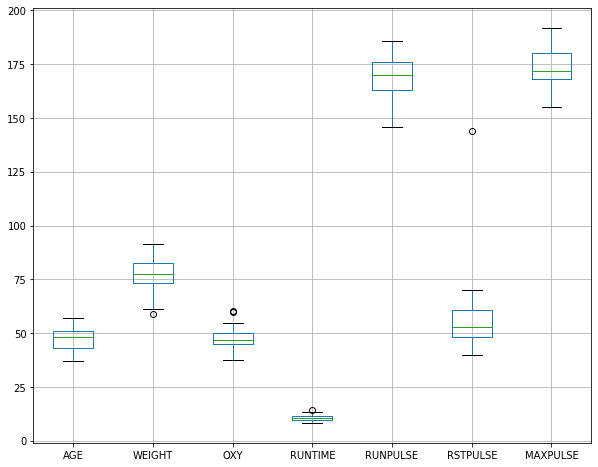

In [8]:
df_raw.boxplot(figsize=(10,8))
print("RSTPULS에서 이상치 확인됨")

In [9]:
df_raw[df_raw['RSTPULSE']>=100]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [10]:
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [11]:
df_fitness = df_raw[df_raw['RSTPULSE']<100]
df_fitness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 30
Data columns (total 10 columns):
NAME        30 non-null object
GENDER      30 non-null object
AGE         30 non-null int64
AGEGROUP    30 non-null object
WEIGHT      30 non-null float64
OXY         30 non-null float64
RUNTIME     30 non-null float64
RUNPULSE    30 non-null int64
RSTPULSE    30 non-null int64
MAXPULSE    30 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.6+ KB


In [12]:
df_fitness.sample(5)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
24,Effie,여성,48,40대,61.24,47.920,11.50,170,52,176
22,Carl,남성,54,50대,79.38,46.080,11.17,156,62,165
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
20,Annie,여성,51,50대,67.25,45.118,11.08,172,48,172
14,Sammy,남성,54,50대,83.12,51.855,10.33,166,50,170


In [13]:
df_fitness.reset_index(drop=True, inplace=True)
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


### Step4. Scale 변환
    scale 변환 대상 변수 = 숫자형 변수(연속형변수)

In [14]:
df_fitness_num= df_fitness.select_dtypes(exclude = "object") # 명목형 변수 제거
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [15]:
df_fitness_char = df_fitness.select_dtypes(include ="object") # 명목형 변수만 선택
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [16]:
#scale-standard : 평균=0, 표준편차=1
df_scale_std = scale(df_fitness_num) # output => Numpy
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)

df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [17]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [18]:
# scale-minmax :: min=0, max=1로 변환
df_scale_minmax = minmax_scale(df_fitness_num) ## Output ==> Numpy
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [19]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [20]:
# scale-robust : 중앙값=0, IQR=1로 변환 ==> 이상치 영향 감소
df_scale_robust = robust_scale(df_fitness_num)

df_scale_robust = pd.DataFrame(df_scale_robust, columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [21]:
df_scale_desc = df_scale_robust.describe()
print(df_scale_desc.round(3))
print("50%(median) == 0")

          AGE  WEIGHT     OXY  RUNTIME  RUNPULSE  RSTPULSE  MAXPULSE
count  30.000  30.000  30.000   30.000    30.000    30.000    30.000
mean   -0.112   0.017   0.123    0.076    -0.022     0.118     0.153
std     0.726   0.868   1.020    0.925     0.772     0.702     0.776
min    -1.312  -1.911  -1.892   -1.535    -1.778    -1.163    -1.417
25%    -0.562  -0.405  -0.365   -0.478    -0.556    -0.419    -0.333
50%     0.000   0.000   0.000    0.000     0.000     0.000     0.000
75%     0.438   0.595   0.635    0.522     0.444     0.581     0.667
max     1.188   1.582   2.559    2.499     1.185     1.628     1.667
50%(median) == 0


##### Scale 변환 결과 비교

In [22]:
df_rstpulse = pd.DataFrame()
df_rstpulse['Raw'] =df_fitness_num['RSTPULSE']
df_rstpulse['Standard'] = df_scale_std['RSTPULSE']
df_rstpulse['MinMax']=df_scale_minmax['RSTPULSE']
df_rstpulse['Robust']= df_scale_robust['RSTPULSE']

df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [23]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37de6e9630>,
      dtype=object)

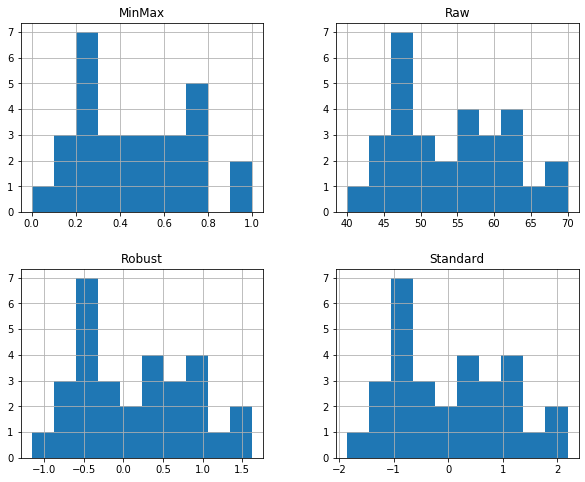

In [24]:
df_rstpulse[['Raw','Standard','MinMax','Robust']].hist(figsize=(10,8))

# EDA

In [25]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns



In [ ]:
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]


In [26]:
matplotlib.rc("font",family = "NanumGothic")


In [27]:
df_fitness = pd.read_csv("data/BigData/FITNESS.csv", encoding="cp949", engine="python")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [66]:
df_currency = pd.read_csv("data/BigData/환율.csv", encoding="cp949",engine="python", parse_dates=["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [29]:
df_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
NAME        31 non-null object
GENDER      31 non-null object
AGE         31 non-null int64
AGEGROUP    31 non-null object
WEIGHT      31 non-null float64
OXY         31 non-null float64
RUNTIME     31 non-null float64
RUNPULSE    31 non-null int64
RSTPULSE    31 non-null int64
MAXPULSE    31 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [30]:
df_fitness.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,46.838710,77.444516,47.375806,10.586129,169.645161,53.451613,173.774194
std,5.860016,8.328568,5.327231,1.387414,10.251986,7.619443,9.164095
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.000000,73.200000,44.964500,9.780000,163.000000,48.000000,168.000000
50%,48.000000,77.450000,46.774000,10.470000,170.000000,52.000000,172.000000
75%,51.000000,82.325000,50.131000,11.270000,176.000000,58.500000,180.000000
max,57.000000,91.630000,60.055000,14.030000,186.000000,70.000000,192.000000


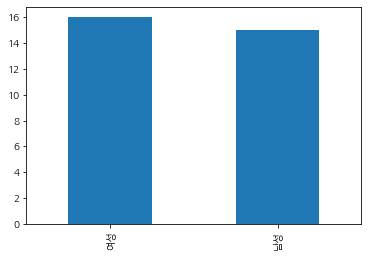

In [31]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

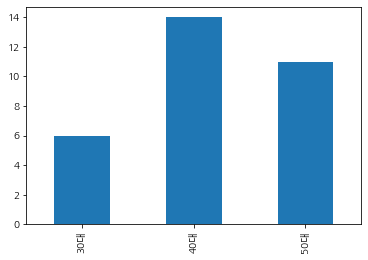

In [32]:
df_count = df_fitness["AGEGROUP"].value_counts()

df_count.sort_index(inplace=True)
df_count.plot.bar()

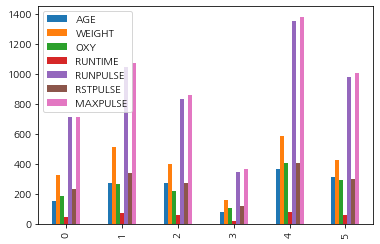

In [33]:
df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"], as_index = False).sum()

df_groupby_total.sort_index(inplace=True)
df_groupby_total.plot.bar()

### histogram 그리기

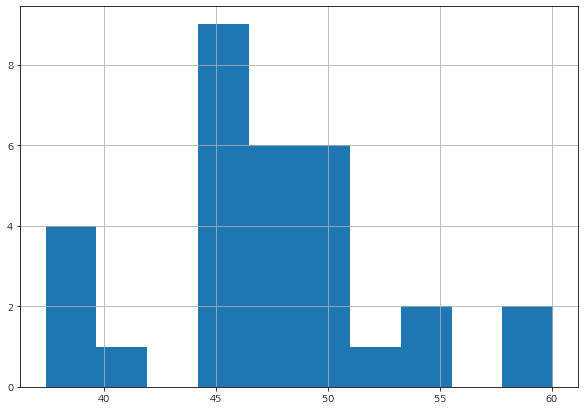

In [34]:
df_fitness['OXY'].hist(figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37de0daf98>,
      dtype=object)

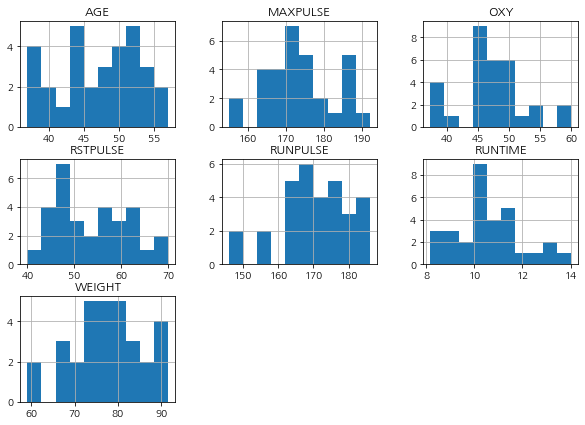

In [35]:
df_fitness.hist(figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37ddd68a90>,
      dtype=object)

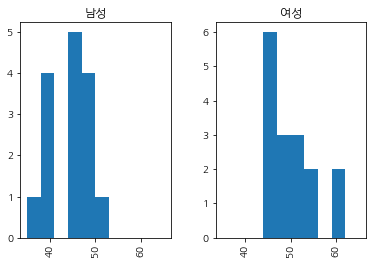

In [36]:
df_fitness.hist(column="OXY", by = "GENDER", range=(35,65))

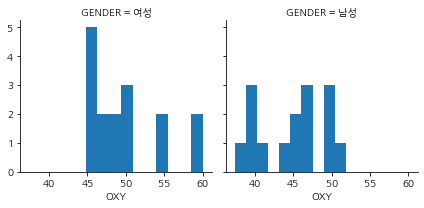

In [37]:
grid = sns.FacetGrid(df_fitness, col = "GENDER")
grid.map(plt.hist, "OXY")

Text(0.5, 1.0, '여성 vs 남성, 혈당 산소요구량')

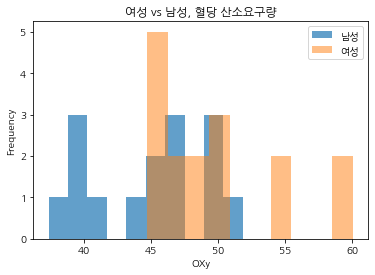

In [38]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label = "남성", alpha=0.7)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label = "여성", alpha=0.5)
plt.legend()
plt.xlabel("OXy")
plt.ylabel("Frequency")
plt.title("여성 vs 남성, 혈당 산소요구량")

##### 구간의 수를 bins로 줘서 상세한 분포 확인이 가능해진다.

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

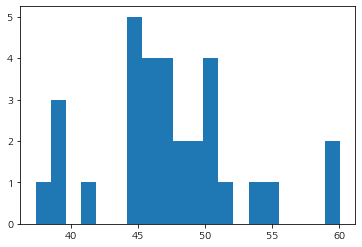

In [41]:
plt.hist(x="OXY", data=df_fitness, bins=20)

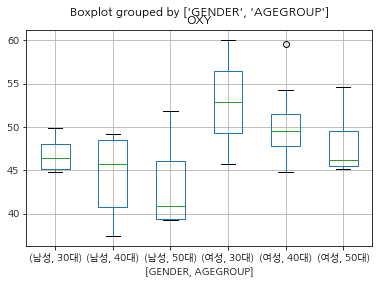

In [46]:
df_fitness.boxplot(column="OXY", by = ['GENDER','AGEGROUP'])

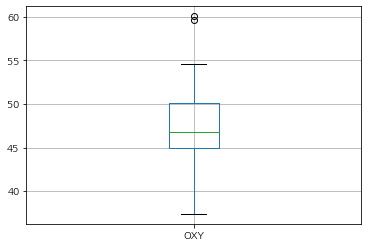

In [48]:
df_fitness.boxplot(column="OXY")

In [47]:
df_fitness['OXY'].describe()

count    31.000000
mean     47.375806
std       5.327231
min      37.388000
25%      44.964500
50%      46.774000
75%      50.131000
max      60.055000
Name: OXY, dtype: float64

In [52]:
df_fitness[df_fitness['OXY']>=55]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186


In [51]:
df_fitness_out = df_fitness[df_fitness['OXY']<55]
df_fitness_out

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168
10,Bob,남성,39,30대,75.07,45.313,10.07,185,62,185
11,Harriett,여성,49,40대,73.37,50.388,10.08,168,67,168


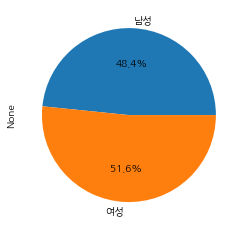

In [53]:
df_count = df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y="OXY", autopct ="%.1f%%")

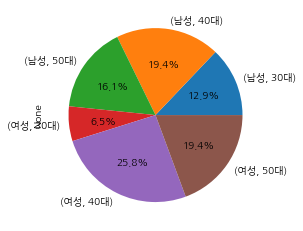

In [54]:
df_count = df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%")

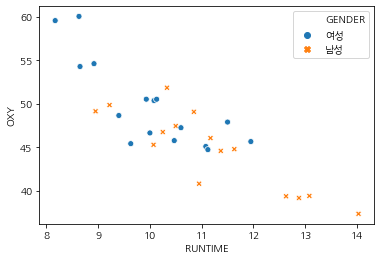

In [55]:
sns.scatterplot(x="RUNTIME", y="OXY", hue="GENDER", style="GENDER", data=df_fitness)

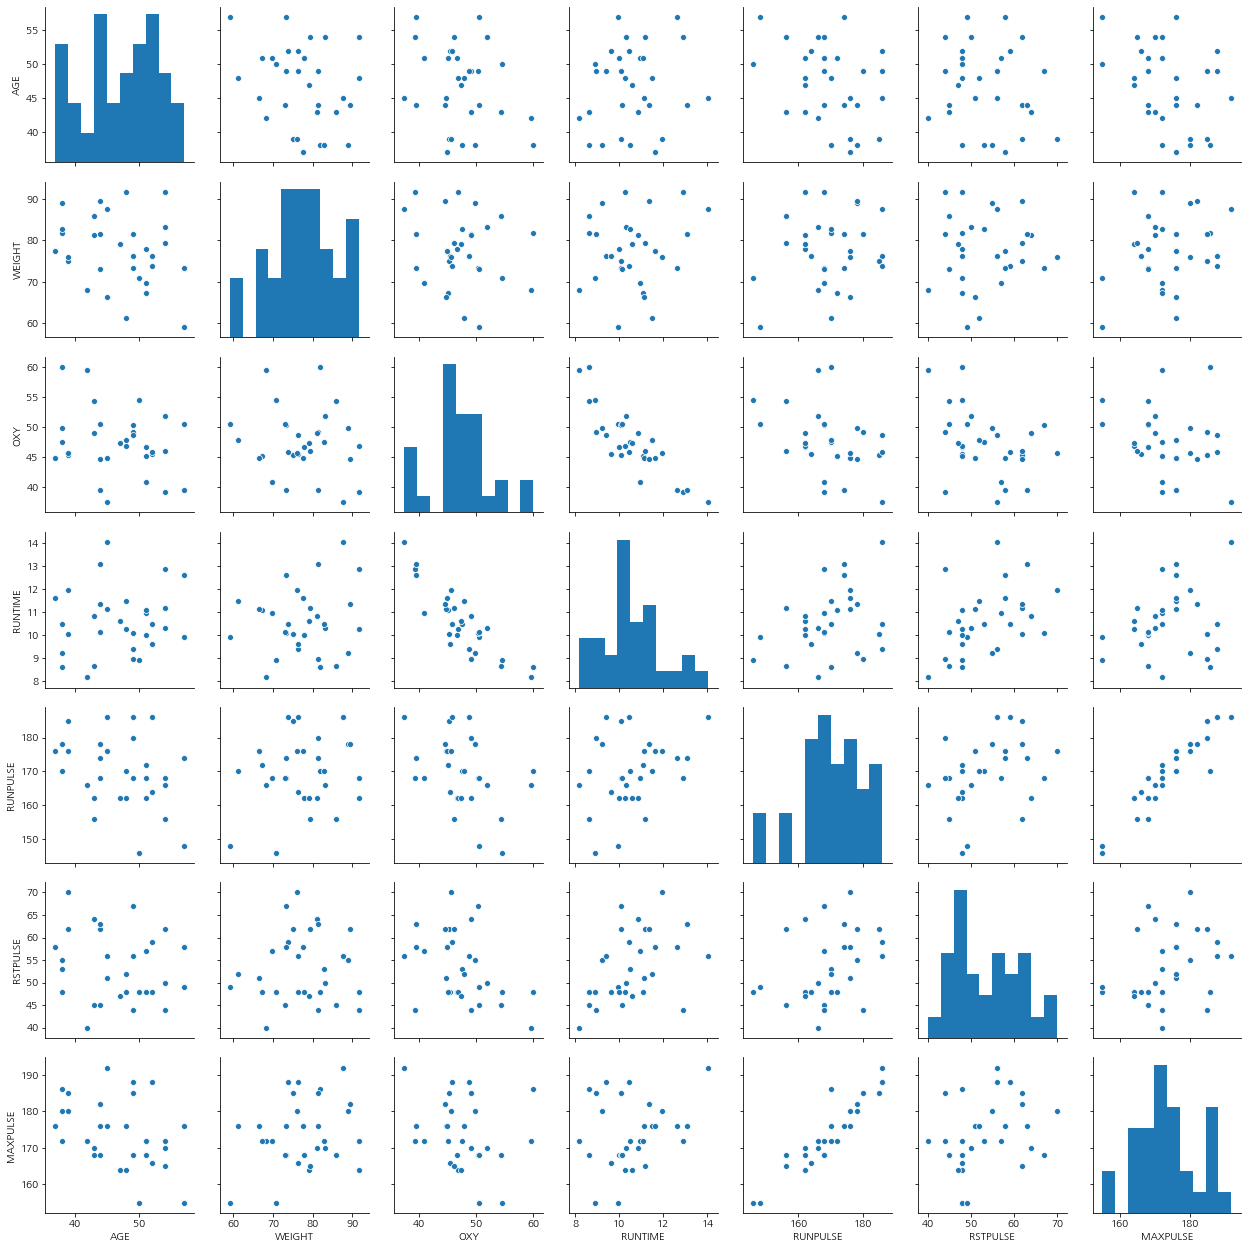

In [56]:
# Scatter Matrix
sns.pairplot(df_fitness)

상관이 높아 보이는 변수만 뽑아서 다시 pairplot그리기

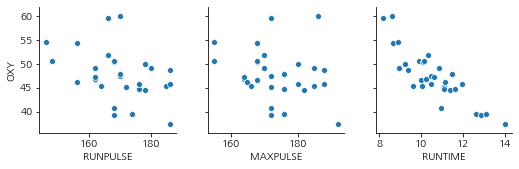

In [57]:
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=['RUNPULSE',"MAXPULSE","RUNTIME"])

## Time-Series Data Analyze

In [67]:
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [71]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
CURRENCY         273 non-null object
APPL_DATE        273 non-null datetime64[ns]
STD_RATE         273 non-null float64
USD_CONV_DATE    273 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.6+ KB


In [72]:
df_currency.isnull().sum()

CURRENCY         0
APPL_DATE        0
STD_RATE         0
USD_CONV_DATE    0
dtype: int64

In [68]:
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


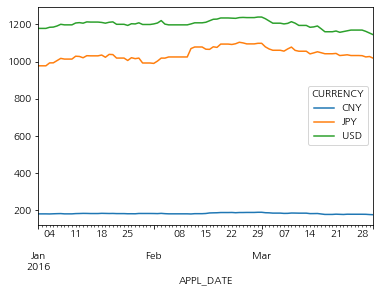

In [75]:
df_currency_pivot.plot()

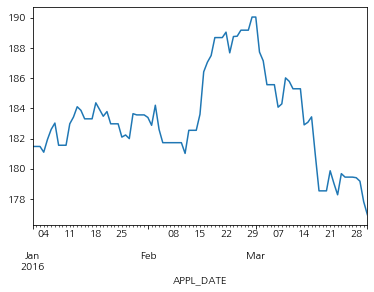

In [74]:
df_currency_pivot['CNY'].plot()

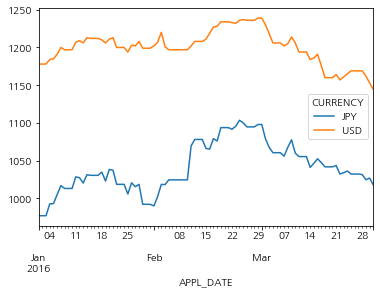

In [76]:
df_currency_pivot[["JPY", "USD"]].plot()

In [77]:
df_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
NAME        31 non-null object
GENDER      31 non-null object
AGE         31 non-null int64
AGEGROUP    31 non-null object
WEIGHT      31 non-null float64
OXY         31 non-null float64
RUNTIME     31 non-null float64
RUNPULSE    31 non-null int64
RSTPULSE    31 non-null int64
MAXPULSE    31 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [78]:
df_fitness.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,44,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56,192


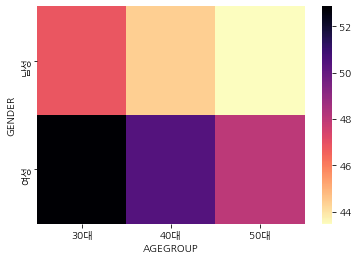

In [91]:
df_agg = df_fitness.groupby(['GENDER','AGEGROUP'], as_index=False).agg('mean')
df_pivot = df_agg.pivot("GENDER","AGEGROUP",'OXY') # x=GENDER, y=AGEGROUP, data=OXY
sns.heatmap(df_pivot, cmap="magma_r")

In [80]:
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


##### contour plot ==> 연속 - 연속

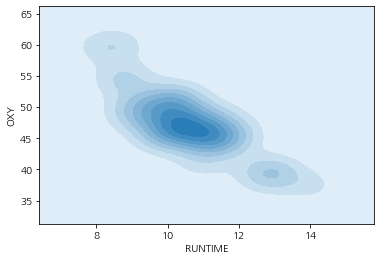

In [93]:
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'],shade=True)

##### Paraller plot ==> 연속 - 연속

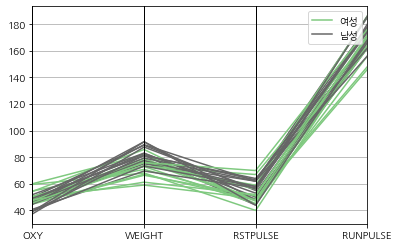

In [101]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=['OXY',"WEIGHT","RSTPULSE", "RUNPULSE"],
                                 colormap="Accent")

### Customizing
기본으로 제공되는 그래프 결과의 가독성 향상을 위해 그래프 속성을 변경하거나 대시보드 등을 구성하여 그래프 정보를 종합적으로 표현하는 작업

Text(486.5477272727271, 0.5, '혈당 산소 요구량')

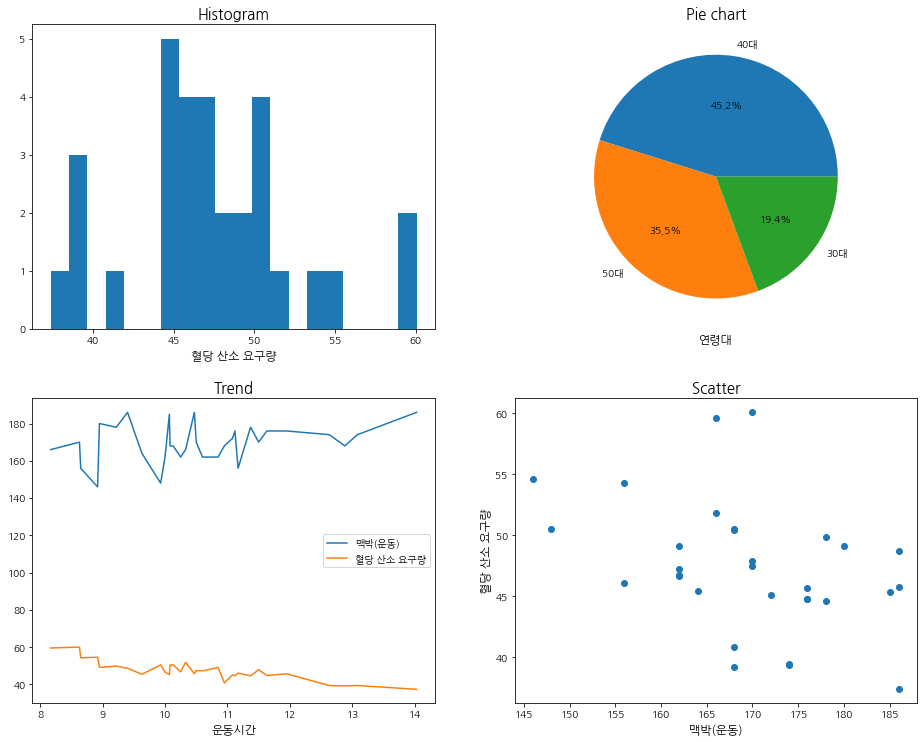

In [107]:
df_count = df_fitness['AGEGROUP'].value_counts() # Pie chart를 위한 집계 데이터
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10)) # 2 x 2 subplot 생성
plt.tight_layout(w_pad=5, h_pad=5)

# [0][0] Histogram
axes[0,0].hist(df_fitness['OXY'], bins=20)
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

# [0][1] Pie chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct="%.1f%%")
axes[0,1].set_title("Pie chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)

# [1][0] Trend
axes[1,0].plot("RUNTIME","RUNPULSE", data=df_fitness, label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY", data=df_fitness, label="혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize=15)
axes[1,0].set_xlabel("운동시간", fontsize=12)
axes[1,0].legend()

# [1][1] Scatter
axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)